# Machine Learning Regresion For Predict Digital_Wellbeing Dataset Mental Health Digital Behavior by Wiga

## Penjelasan

### Dataset Overview
Kumpulan data ini berisi data simulasi tentang bagaimana perilaku digital berkorelasi dengan indikator kesehatan mental, khususnya berfokus pada faktor-faktor seperti waktu penggunaan layar, penggunaan aplikasi, tidur, dan konsumsi media sosial. Kumpulan data ini ideal untuk tugas pembelajaran mesin seperti regresi, klasifikasi, dan pengelompokan untuk menganalisis hubungan antara pola perilaku digital dan kesejahteraan mental.

Data tersebut mencakup aspek-aspek perilaku digital dan kesehatan mental berikut.

Digital Behavior:

1. Daily screen time (minutes)
2. Number of app switches
3. Social media usage time (minutes)
4. Notification count
5. Focus and concentration scores

Mental Health Indicators:
1. Mood score (self-reported)
2. Anxiety levels (self-reported)
3. Sleep duration (hours)

### Penjelasan Variabel Dataset :

| Feature Name              | Description                                                                                      | Data Type |
|---------------------------|--------------------------------------------------------------------------------------------------|-----------|
| daily_screen_time_min     | Total daily screen time (mobile + desktop, in minutes)                                           | Numeric   |
| num_app_switches          | Number of times the user switched between apps in a day                                          | Integer   |
| sleep_hours               | Number of hours slept per day                                                                    | Numeric   |
| notification_count        | Number of notifications received by the user in a day                                            | Integer   |
| social_media_time_min     | Time spent on social media platforms (e.g., Instagram, Facebook, YouTube) in minutes             | Numeric   |
| focus_score               | Self-reported focus score (1–10, where 1 is very distracted and 10 is highly focused)            | Numeric   |
| mood_score                | Self-reported mood score (1–10, where 1 is very poor mood and 10 is excellent mood)              | Numeric   |
| anxiety_level             | Self-reported anxiety level (1–10, where 1 is low anxiety and 10 is high anxiety)                | Numeric   |
| digital_wellbeing_score   | Calculated score based on focus, sleep, and anxiety levels; higher value represents better well-being | Numeric   |

Dataset ini sudah bersih dan bebas dari :

1. Null values
2. Duplicate records
3. Outliers (except for intentionally simulated ones)

### Sumber dataset :

 https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-digital-behavior-20202024?select=mental_health_digital_behavior_data.csv

### Tujuan

Melakukan Prediksi Kesejahteraan Digital berdasarkan perilaku digital. menggunakan model Regresi Linier, Random Forest Regressor, dan XG Boost Regressor.

## Prediksi Kesehatan Digital (Digital Well Being)

### Import Library & Load Dataset

In [1]:
# 1. Install dan import pustaka penting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files

# 2. Upload file CSV
uploaded = files.upload()

# 3. Load dataset
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving mental_health_digital_behavior_data.csv to mental_health_digital_behavior_data.csv


,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,389.8,53,5.9,89,133.2,6.8,8.9,10.0,44.8
1,351.7,52,7.2,79,109.5,5.5,9.4,10.0,43.6
2,398.9,39,8.0,108,84.7,6.7,9.4,9.4,52.6
3,451.4,44,6.5,78,88.9,6.0,9.4,5.1,58.4
4,346.0,43,6.9,35,78.8,8.2,9.4,8.0,59.7


### Eksplorasi Data (EDA - Exploratory Data Analysis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   daily_screen_time_min    500 non-null    float64
 1   num_app_switches         500 non-null    int64  
 2   sleep_hours              500 non-null    float64
 3   notification_count       500 non-null    int64  
 4   social_media_time_min    500 non-null    float64
 5   focus_score              500 non-null    float64
 6   mood_score               500 non-null    float64
 7   anxiety_level            500 non-null    float64
 8   digital_wellbeing_score  500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


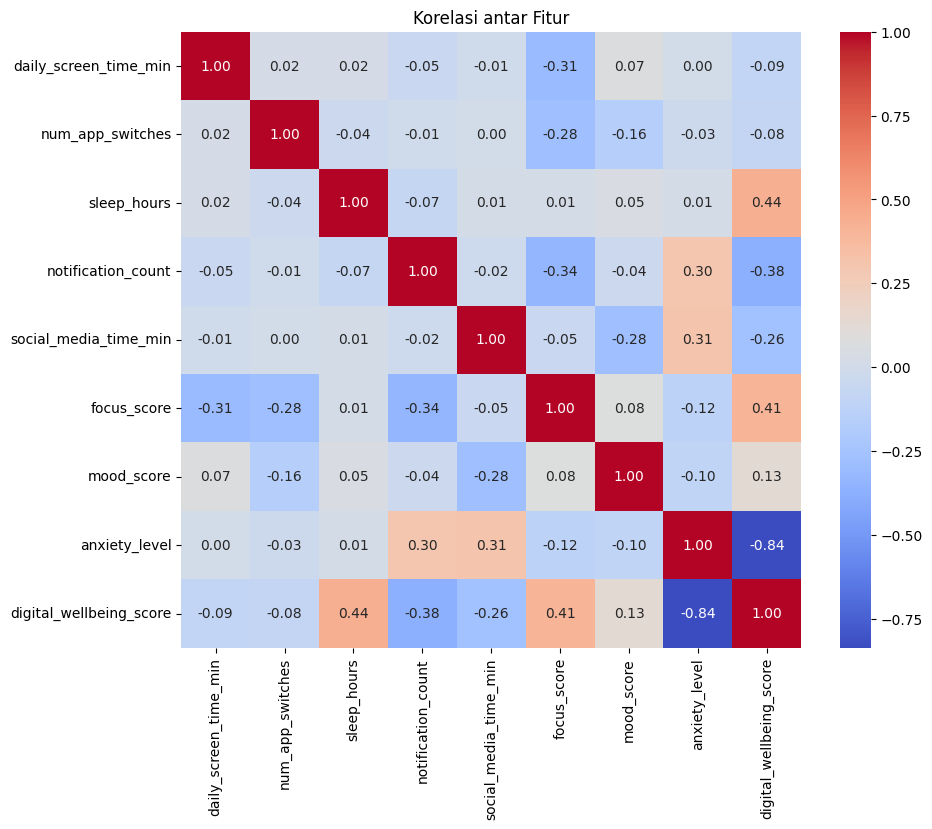

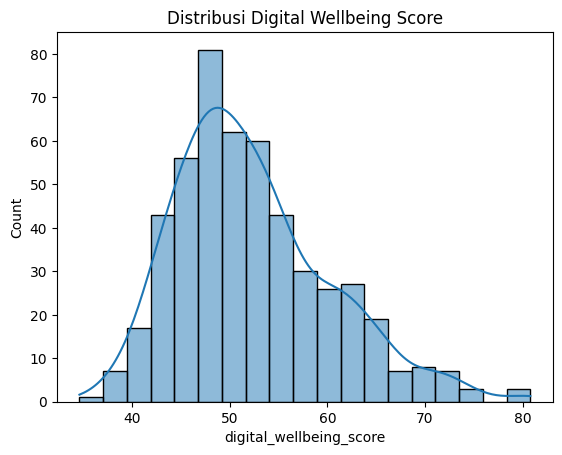

In [2]:
# Cek informasi umum
df.info()

# Statistik deskriptif
df.describe()

# Cek korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antar Fitur")
plt.show()

# Distribusi target
sns.histplot(df['digital_wellbeing_score'], kde=True)
plt.title("Distribusi Digital Wellbeing Score")
plt.show()


### Pre-Processing Data

In [3]:
# Pisahkan fitur dan target
X = df.drop('digital_wellbeing_score', axis=1)
y = df['digital_wellbeing_score']

# Split data: 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optional: Normalisasi (bisa di-skip untuk tree-based model)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Data Modeling dan Evaluasi

#### Linier Regresi

In [4]:
# Inisialisasi model
lr_model = LinearRegression()

# Latih model
lr_model.fit(X_train_scaled, y_train)

# Prediksi pada data test
y_pred = lr_model.predict(X_test_scaled)

In [16]:
# Evaluasi performa
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Performance ===")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


=== Linear Regression Performance ===
MAE:  0.15
MSE:  0.03
RMSE: 0.18
R²:   1.00


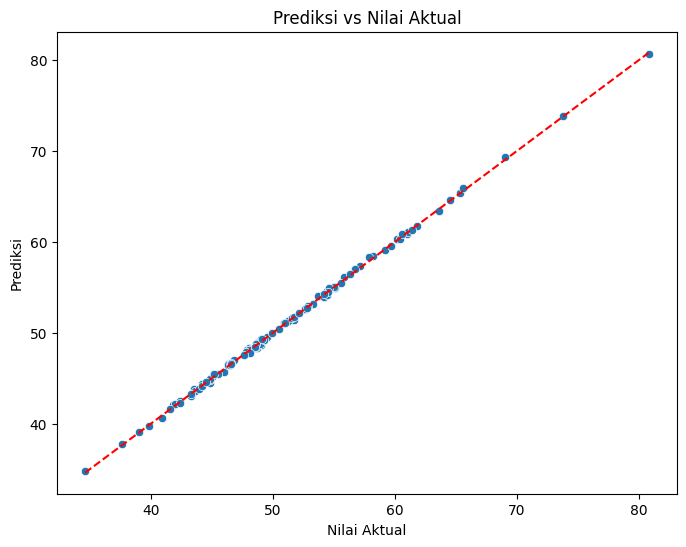

In [6]:
# Grafik hasil prediksi vs nilai asli
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi vs Nilai Aktual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#### Random Forest Regresor

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluasi
print("=== Random Forest Performance ===")
print(f"MAE:  {mean_absolute_error(y_test, rf_pred):.2f}")
print(f"MSE:  {mean_squared_error(y_test, rf_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred)):.2f}")
print(f"R²:   {r2_score(y_test, rf_pred):.2f}")

=== Random Forest Performance ===
MAE:  0.92
MSE:  2.00
RMSE: 1.42
R²:   0.97


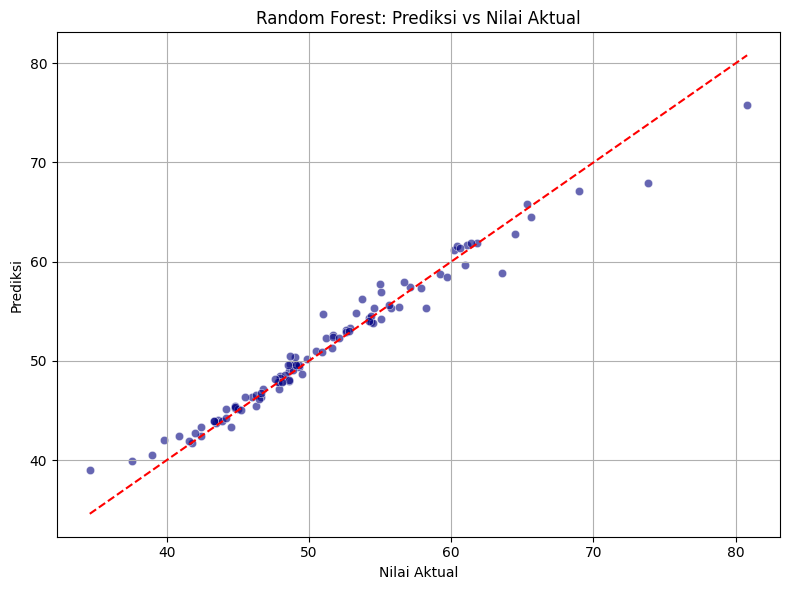

In [8]:
# Scatter Plot: Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred, color='navy', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis ideal
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Random Forest: Prediksi vs Nilai Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

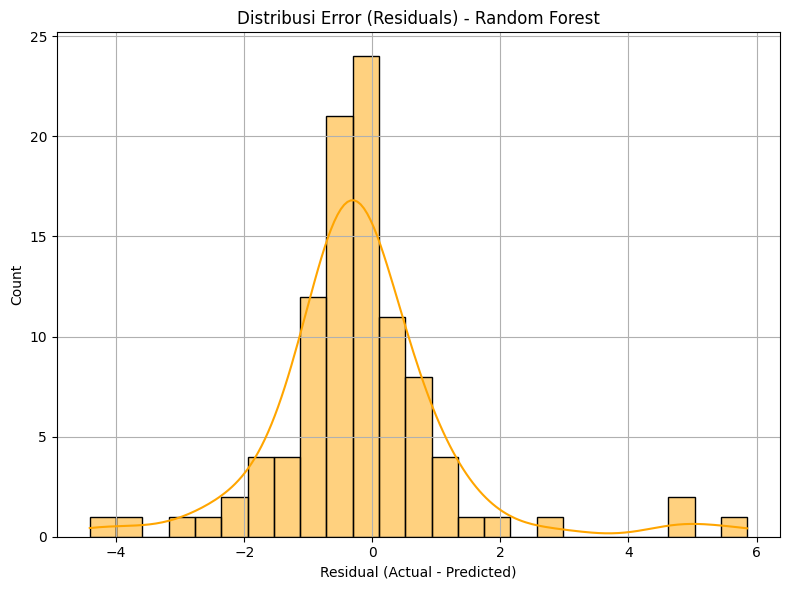

In [9]:
# Histogram Residuals: Distribusi Error
# Residual = selisih antara prediksi dan aktual
rf_residuals = y_test - rf_pred

plt.figure(figsize=(8, 6))
sns.histplot(rf_residuals, kde=True, color='orange')
plt.title("Distribusi Error (Residuals) - Random Forest")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Tabel Perbandingan Nilai
# Buat DataFrame perbandingan hasil
rf_comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': rf_pred
}).reset_index(drop=True)

# Tampilkan 10 hasil pertama
rf_comparison_df.head(10)

,Actual,Predicted
0,49.3,49.416
1,64.5,62.782
2,44.8,45.225
3,63.6,58.889
4,53.7,56.248
5,46.0,46.356
6,53.3,54.828
7,46.3,46.589
8,44.8,45.422
9,69.0,67.125


##### Feature Importance Analysis

 menganalisis feature importance dari model Random Forest Regressor untuk mengetahui fitur mana yang paling berpengaruh terhadap prediksi Digital Wellbeing Score

                 Feature  Importance
7          anxiety_level    0.715901
2            sleep_hours    0.175597
5            focus_score    0.081779
3     notification_count    0.005766
1       num_app_switches    0.005517
4  social_media_time_min    0.005472
0  daily_screen_time_min    0.005447
6             mood_score    0.004522


<ipython-input-11-f543e0741ea1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


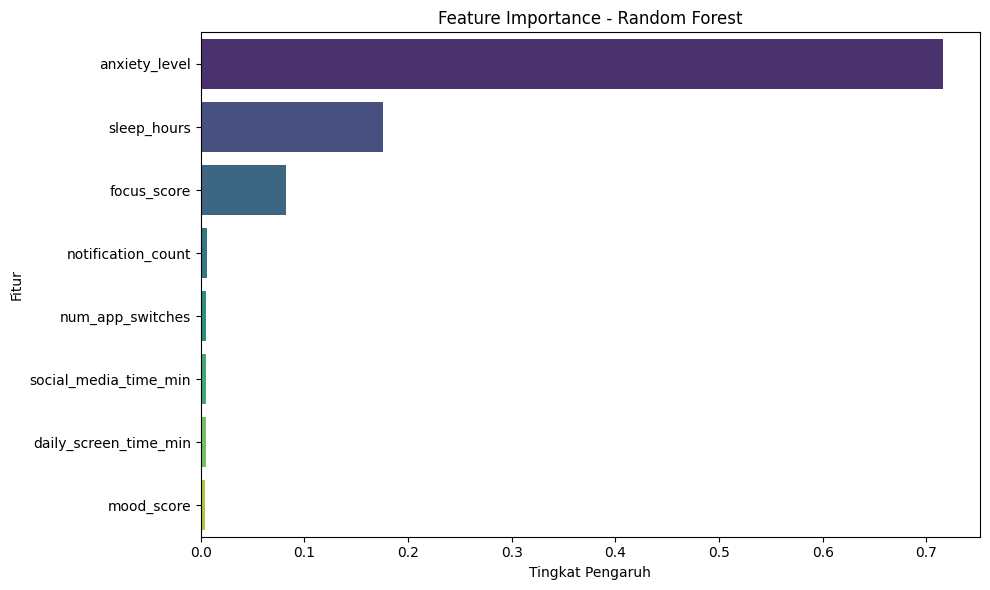

In [11]:
# Ambil nilai pentingnya tiap fitur
importances = rf_model.feature_importances_
feature_names = X.columns

# Buat DataFrame dari nilai importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Tampilkan tabelnya
print(importance_df)

# Visualisasi barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Tingkat Pengaruh")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()


#### XGBoost Regressor

In [12]:
# Install XGBoost (jika belum)
!pip install xgboost

# Import
from xgboost import XGBRegressor

# Inisialisasi model XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Latih model (gunakan data tanpa scaling, karena XGBoost tidak perlu normalisasi)
xgb_model.fit(X_train, y_train)

# Prediksi
xgb_pred = xgb_model.predict(X_test)

# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("=== XGBoost Performance ===")
print(f"MAE:  {mean_absolute_error(y_test, xgb_pred):.2f}")
print(f"MSE:  {mean_squared_error(y_test, xgb_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred)):.2f}")
print(f"R²:   {r2_score(y_test, xgb_pred):.2f}")

=== XGBoost Performance ===
MAE:  0.93
MSE:  2.24
RMSE: 1.50
R²:   0.96


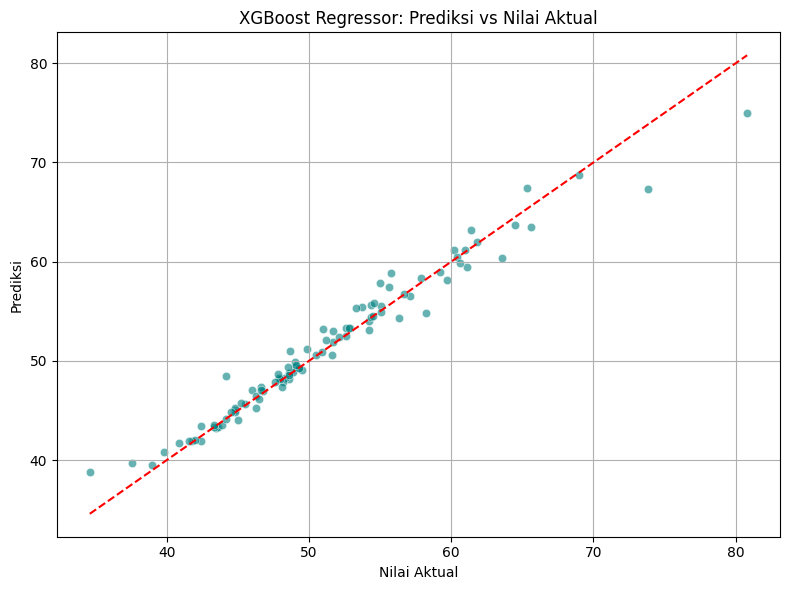

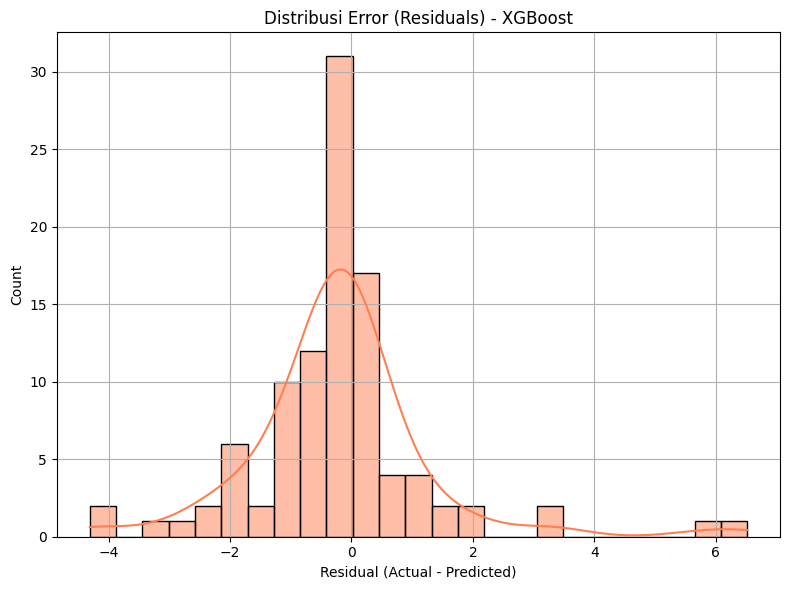

In [13]:
# Scatter plot hasil prediksi vs nilai aktual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=xgb_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis ideal
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("XGBoost Regressor: Prediksi vs Nilai Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual = selisih antara prediksi dan aktual
residuals = y_test - xgb_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='coral')
plt.title("Distribusi Error (Residuals) - XGBoost")
plt.xlabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# Buat DataFrame perbandingan hasil
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': xgb_pred
}).reset_index(drop=True)

# Tampilkan 10 hasil pertama
comparison_df.head(10)

,Actual,Predicted
0,49.3,49.269894
1,64.5,63.675716
2,44.8,45.072723
3,63.6,60.351650
4,53.7,55.422794
5,46.0,47.113712
6,53.3,55.331726
7,46.3,46.459370
8,44.8,44.846344
9,69.0,68.775917


##### Feature Importance

menganalisis feature importance dari model XGBoost Regresseor untuk mengetahui fitur mana yang paling berpengaruh terhadap prediksi Digital Wellbeing Score

<ipython-input-15-42622f7d8e4b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=xgb_imp_df, x='Importance', y='Feature', palette='mako')


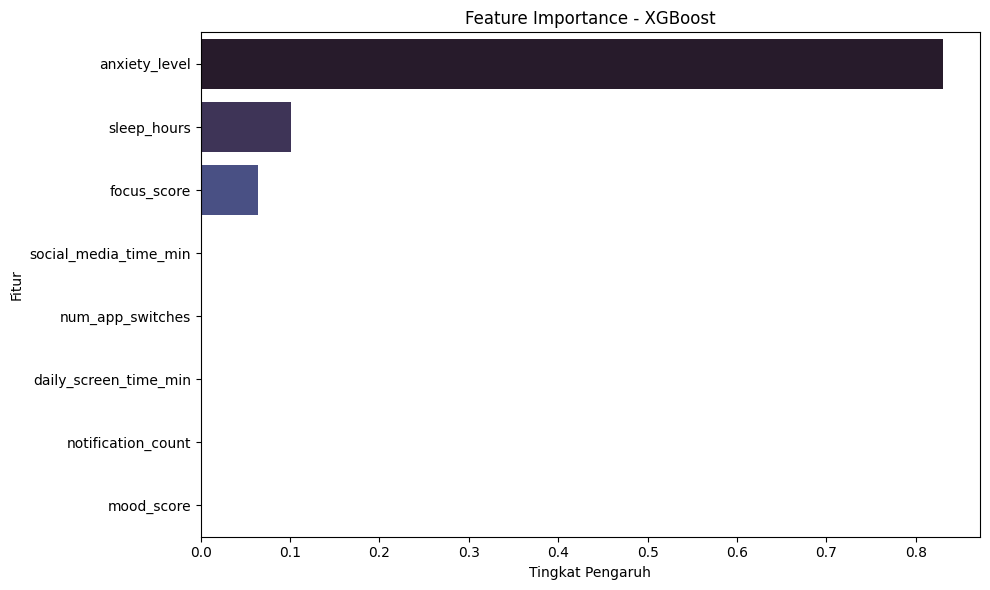

In [15]:
# Ambil feature importance
xgb_importance = xgb_model.feature_importances_

# Buat DataFrame
xgb_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importance
}).sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=xgb_imp_df, x='Importance', y='Feature', palette='mako')
plt.title("Feature Importance - XGBoost")
plt.xlabel("Tingkat Pengaruh")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

#### Evaluasi Keseluruhan Model

| Model                 | MAE  | MSE   | RMSE | R² Score |
| --------------------- | ---- | ----- | ---- | -------- |
| **Linear Regression** | 0.15 | 0.03 | 0.1 | 1.00     |
| **Random Forest**     | 0.92 | 2.00 | 1.42 | 0.97     |
| **XGBoost**           | 0.93 | 2.24 | 1.50 | 0.96     |
